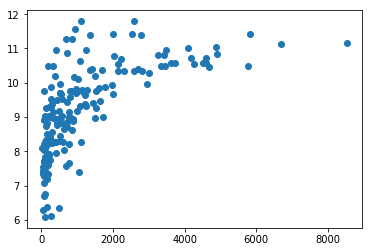

In [38]:
import numpy as np 
import matplotlib.pyplot as plt 

import pandas as pd

data = pd.read_csv('years-lived-with-disability-vs-health-expenditure-per-capita.csv')
data = data[data['Year'] == 2011]
data = data.dropna() 
x = np.array(data['Health_expenditure_per_capita_PPP'])
y = np.array(data['Years_Lived_With_Disability'])

plt.scatter(x,y)
plt.show()

In [58]:
###Usamos un modelo lineal
def model(x_obs, m):
    y_model = m[0]*x_obs + m[1]
    return y_model

###En un principio había  usado un likelihood gaussiano pero no tenía el sigma de los datos y jaime lo hace
###Mucho más facil usando la función gamma 
def loglikelihood(x_obs, y_obs, m):
    y_model = model(x_obs, m)
    p = y_model * np.exp(-(y_model/y_obs))# gamma con k=2 https://en.wikipedia.org/wiki/Gamma_distribution
    p = p/(y_obs**2)
    p = np.log(p)
    return np.sum(p)

In [67]:
#Definimos el prior, al final usé los mismos números que jaime por comodidad
def logprior(m):
    p = -np.inf
    if np.abs(m[0] < 1E-2) and m[1] < 20 and m[1]>0:
        area = 2.0 * 1E-2 * 20.0
        p = np.log(1.0/area)
    return p

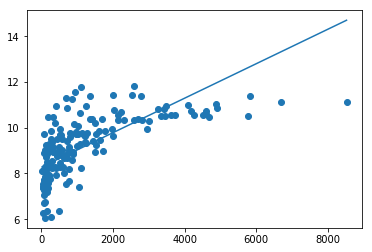

In [87]:
#esta es mi implementación, modifiqué los valores de lista_m y sigma_m con los de jaime porque con random.random() que es
#como lo haciamos antes no daba.
N = 50000
lista_m = [np.array([1/8000.0, 10.0])]
logposterior = [0]
sigma_m = np.array([1E-4, 0.5])
n_param = len(sigma_m)


for i in range(1,N):
    propuesta_m  = lista_m[i-1] + np.random.normal(size = n_param)*sigma_m
    logposterior_viejo = loglikelihood(x, y, lista_m[i-1]) + logprior(lista_m[i-1])
    logposterior_nuevo = loglikelihood(x, y, propuesta_m) + logprior(propuesta_m)

    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    k = np.random.random()
    if(k<r):
        lista_m.append(propuesta_m)
        logposterior.append(logposterior_nuevo)
    else:
        lista_m.append(lista_m[i-1])
        logposterior.append(logposterior_viejo)
lista_m = np.array(lista_m)
lista_m = lista_m[N//10:,:]
logposterior = np.array(logposterior)
logposterior = logposterior[N//10:]


x_n = np.linspace(spending.min(), spending.max(), 100)
y_model = model(x_n,[lista_m[:,0].mean(),lista_m[:,1].mean()])
plt.scatter(x, y)
plt.plot(x_n, y_model)
plt.show()